# Reading in data

We first have to import the `SIPSpectrum` class

In [1]:
from pygimli.physics import SIPSpectrum


Suppose we have two files from SIP-Quad with .res ending (instrument specific format) and txt ending (column-format):

```
          f[Hz]        A[ohm]     phi[°]     dA[%]   dphi[°]  Rho[Ohm*m]   phi[mrad]   dphi[mrad] sigma2[mS/m]	sigma1[mS/m]
  249962.264151      3649.329   -21.5831    0.0006    0.0003      103.98     376.696     0.005236       3.5378       8.9433
  129600.000000      3899.938   -12.6201    0.0006    0.0003      111.12     220.262     0.005236       1.9663       8.7821
   60000.000000      4037.031    -6.7950    0.0011    0.0006      115.02     118.595     0.010472       1.0286       8.6329
```

First, we import the res file directly

SIPSpectrum object
nf=29 min/max=0.001073/249962.264151


(<Figure size 640x480 with 2 Axes>,
 array([<Axes: title={'center': 'BaB01_14-04-2021_Q1'}, xlabel='f (Hz)', ylabel='$\\rho$ ($\\Omega$m)'>,
        <Axes: xlabel='f (Hz)', ylabel='$-\\phi$ (mrad)'>], dtype=object))

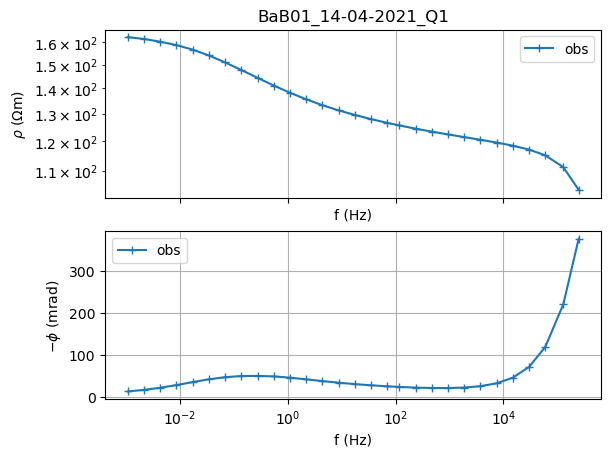

In [4]:
res = SIPSpectrum('BaB01_14-04-2021_Q1.res', k=0.0285)
print(res)
res.showData()

Second, we import the txt file but provide the column numbers for the phase (and frequency, amplitude if necessary)

SIPSpectrum object
nf=29 min/max=0.001073/249962.264151


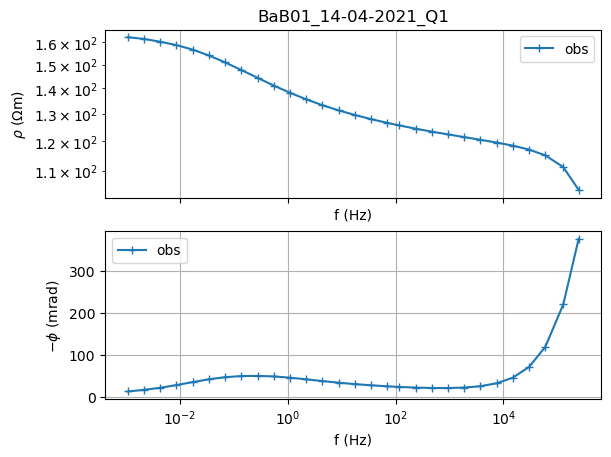

In [5]:
txt = SIPSpectrum("BaB01_14-04-2021_Q1.txt", k=0.0285, nphi=6, sphi=0.001)  # nfr=0, namp=1 are defaults
print(txt)
fig, ax = txt.showData()

Third, we read the data by our own (e.g. using numpy or pandas) and look what we have

In [6]:
import numpy as np
data = np.genfromtxt("BaB01_14-04-2021_Q1.txt", names=True)
print(data.dtype.names)

('fHz', 'Aohm', 'phi°', 'dA', 'dphi°', 'RhoOhmm', 'phimrad', 'dphimrad', 'sigma2mSm', 'sigma1mSm')


We use these columns directly and initialize the class by hand.

SIPSpectrum object
nf=29 min/max=0.001073/249962.264151


(<Figure size 640x480 with 2 Axes>,
 array([<Axes: title={'center': 'new'}, xlabel='f (Hz)', ylabel='$\\rho$ ($\\Omega$m)'>,
        <Axes: xlabel='f (Hz)', ylabel='$-\\phi$ (mrad)'>], dtype=object))

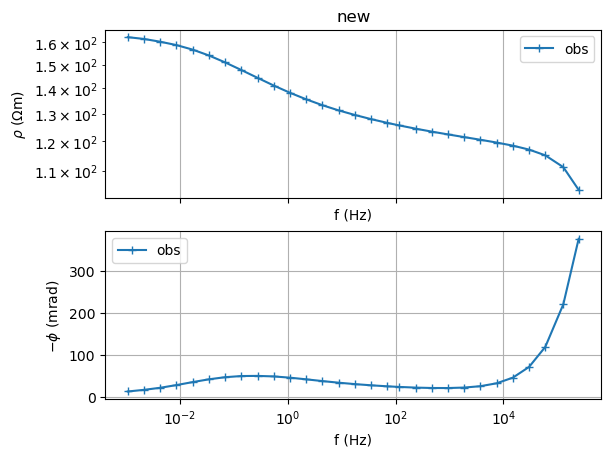

In [7]:
spec = SIPSpectrum(f=data["fHz"], amp=data["Aohm"]*0.0285, phi=data["phimrad"]/1000)
print(spec)
spec.showData()

Return argument is a figure and two axes, so we can tweak those.

Text(0.5, 1.0, 'My bombastic data')

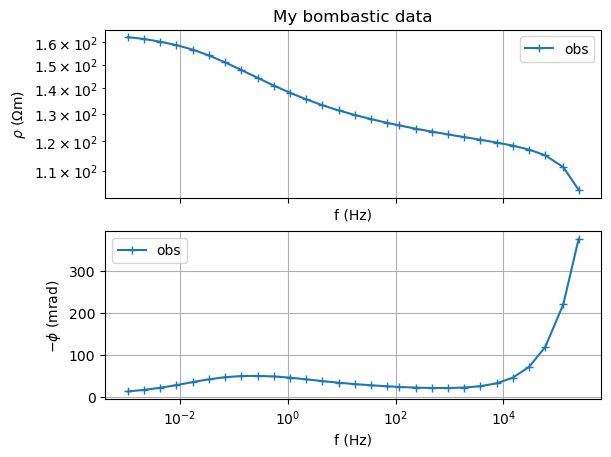

In [8]:
fig, ax = spec.showData()
ax[0].set_title("My bombastic data")

In [13]:
print(spec.f)
print(spec.amp)
print(spec.phi)
print(np.column_stack([spec.f, spec.amp, spec.phi*1000]))

[1.07300000e-03 2.14600000e-03 4.29200000e-03 8.58300000e-03
 1.71660000e-02 3.43320000e-02 6.86650000e-02 1.37329000e-01
 2.74658000e-01 5.49316000e-01 1.09863300e+00 2.19726600e+00
 4.39453100e+00 8.78906200e+00 1.75781250e+01 3.51562500e+01
 7.03125000e+01 1.17187500e+02 2.34375000e+02 4.68750000e+02
 9.37500000e+02 1.87500000e+03 3.75000000e+03 7.50000000e+03
 1.50000000e+04 3.00000000e+04 6.00000000e+04 1.29600000e+05
 2.49962264e+05]
[162.490983  161.64516   160.337979  158.7742695 156.681258  154.0317555
 150.940902  147.620766  144.290883  141.0657945 138.126504  135.5065275
 133.1913585 131.187495  129.450876  127.8877935 126.4957965 125.555838
 124.3832625 123.30525   122.304501  121.350891  120.4101915 119.4291075
 118.355313  116.9967465 115.0553835 111.148233  104.0058765]
[0.01223  0.01612  0.021082 0.027513 0.034636 0.041279 0.046318 0.049098
 0.049417 0.04818  0.045171 0.041235 0.037064 0.033194 0.029829 0.02699
 0.024541 0.023085 0.021525 0.020563 0.02044  0.021602 0.0